<a href="https://colab.research.google.com/github/kebabee/Machine-Learning/blob/main/experimental_data_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import BayesianRidge

# 1. Fit experimental data


### 20 pseudo-data asuming that the true function reads $\frac{x}{2} + 0.5 x^2 sin(6x^2)$ with Gaussian noise (three scales of the noise).

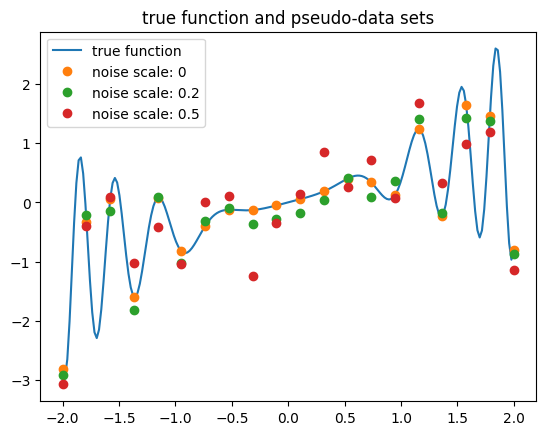

In [2]:
def f(x):
  return x/2 + 0.5*x**2*np.sin(6*x**2)

x = np.linspace(-2, 2, 20)
x_plot = np.linspace(-2, 2, 200)
scales = [0, 0.2, 0.5]
y_trains = []
plt.plot(x_plot, f(x_plot), label='true function')

for scale in scales:
  y = f(x) + np.random.normal(scale=scale, size=len(x))
  y_trains.append(y)
  plt.plot(x, y, 'o', label=f'noise scale: {scale}')

plt.title('true function and pseudo-data sets')
plt.legend()
plt.show()

## 1.1

### Fit the polynomials of degrees 3, 10, and 20 using PolynomialFeatures from sklearn

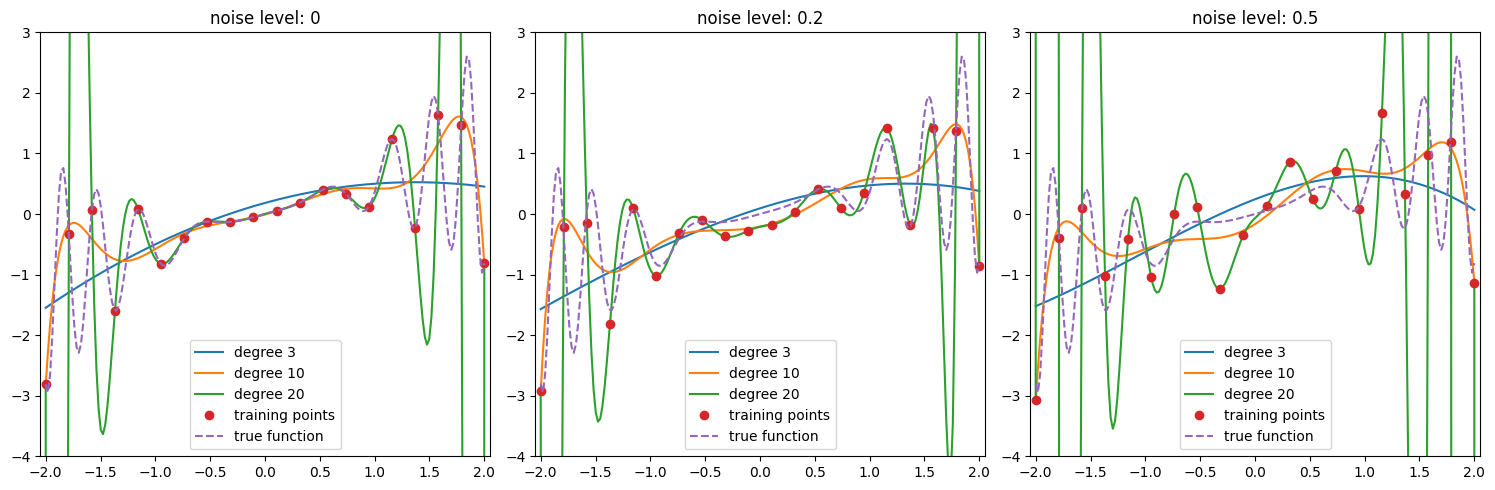

In [4]:
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
degrees = [3, 10, 20]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, y_trains[i])
        y_plot = model.predict(X_plot)
        axs[i].plot(X_plot, y_plot, label=f"degree {degree}")

    axs[i].plot(x, y_trains[i], 'o', label=f'training points')
    axs[i].plot(X_plot, f(X_plot), label='true function', linestyle='--')
    axs[i].set_ylim(-4, 3)
    axs[i].set_xlim(-2.05, 2.05)
    axs[i].legend()
    axs[i].set_title(f"noise level: {scales[i]}")

plt.tight_layout()
plt.show()

## 1.2

### Fit the polynomials of degrees 3, 10, and 20 using polyfit from numpy

<ipython-input-5-31333eda03f7>:5: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_trains[i], degree)
<ipython-input-5-31333eda03f7>:5: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_trains[i], degree)
<ipython-input-5-31333eda03f7>:5: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_trains[i], degree)


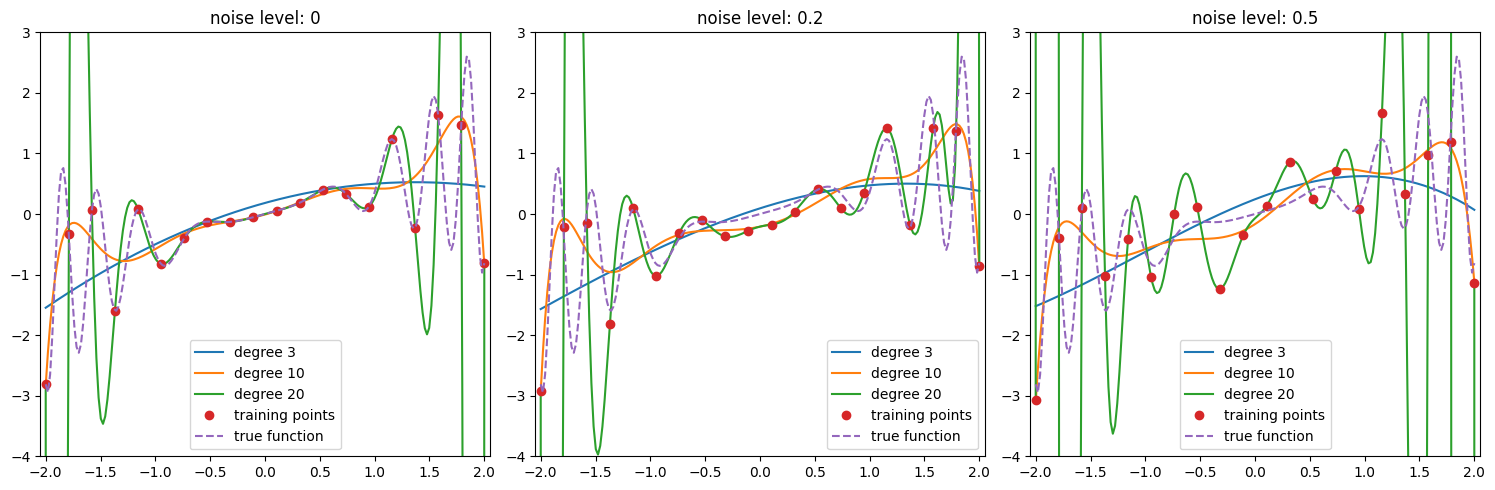

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    for degree in degrees:
        coeffs = np.polyfit(x, y_trains[i], degree)
        poly = np.poly1d(coeffs)
        y_plot = poly(X_plot)
        axs[i].plot(X_plot, y_plot, label=f"degree {degree}")

    axs[i].plot(x, y_trains[i], 'o', label=f'training points')
    axs[i].plot(X_plot, f(X_plot), label='true function', linestyle='--')
    axs[i].set_ylim(-4, 3)
    axs[i].set_xlim(-2.05, 2.05)
    axs[i].legend()
    axs[i].set_title(f"noise level: {scales[i]}")

plt.tight_layout()
plt.show()

PolynomialFeatures vs polyfit:

<ipython-input-6-ec71d89d81e5>:9: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_trains[2], degree)


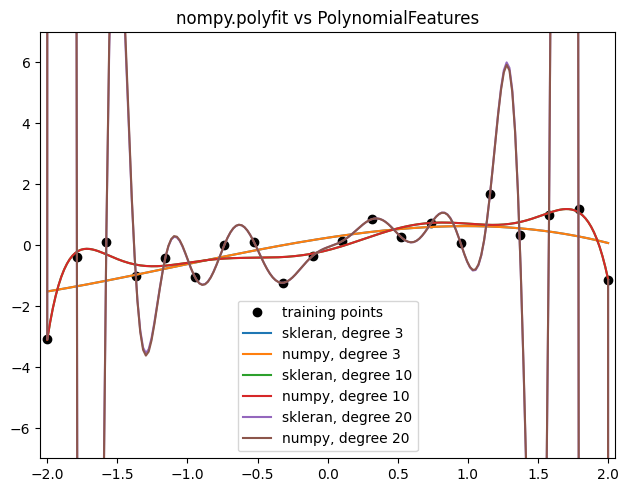

In [6]:
plt.plot(x, y_trains[i], 'o', label=f'training points', c='black')

for degree in degrees:
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(X, y_trains[2])
  y_plot = model.predict(X_plot)
  plt.plot(X_plot, y_plot, label=f"skleran, degree {degree}")

  coeffs = np.polyfit(x, y_trains[2], degree)
  poly = np.poly1d(coeffs)
  y_plot = poly(X_plot)
  plt.plot(X_plot, y_plot, label=f"numpy, degree {degree}")

plt.ylim(-7,7)
plt.xlim(-2.05,2.05)
plt.legend()
plt.tight_layout()
plt.title("nompy.polyfit vs PolynomialFeatures")
plt.show()

In [7]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

## 1.2

### Fit the polynomials of degrees 3, 10, and 20 using polynomial.legendre from numpy

/usr/local/lib/python3.10/dist-packages/numpy/polynomial/legendre.py:1412: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


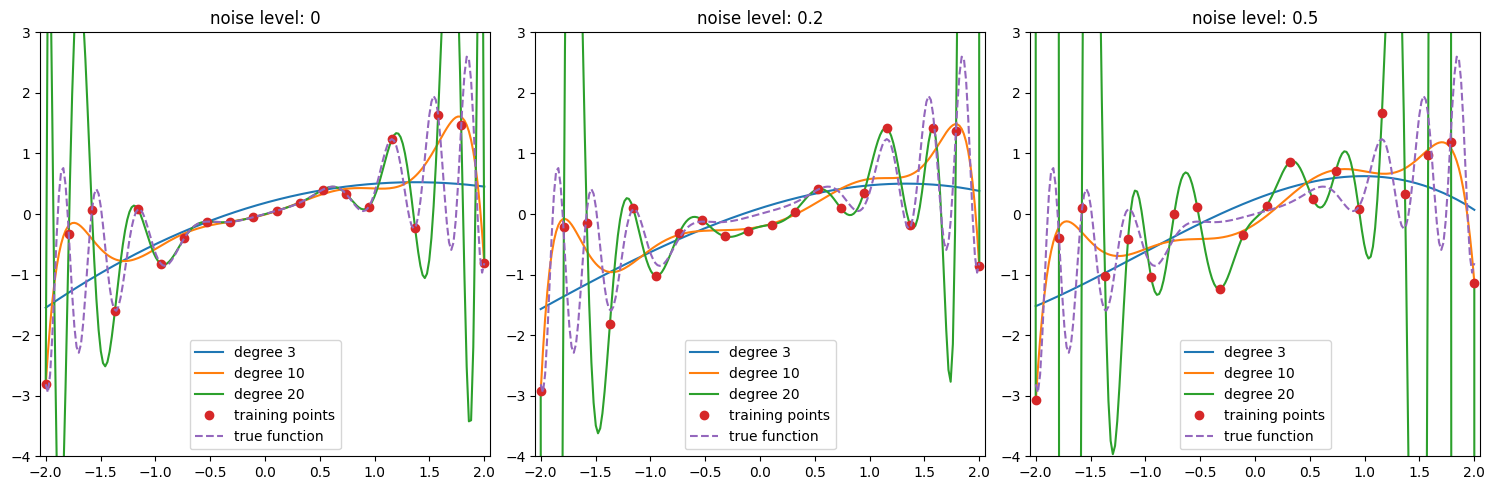

In [8]:
from numpy.polynomial.legendre import Legendre
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    for degree in degrees:
        legendre_coeffs = Legendre.fit(x, y_trains[i], degree)
        legendre_poly = legendre_coeffs(X_plot)
        axs[i].plot(X_plot, legendre_poly, label=f"degree {degree}")

    axs[i].plot(x, y_trains[i], 'o', label=f'training points')
    axs[i].plot(X_plot, f(X_plot), label='true function', linestyle='--')
    axs[i].set_ylim(-4, 3)
    axs[i].set_xlim(-2.05, 2.05)
    axs[i].legend()
    axs[i].set_title(f"noise level: {scales[i]}")

plt.tight_layout()
plt.show()

polyfit vs legendre polynomials:

<ipython-input-9-4181b048187a>:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_trains[2], degree)


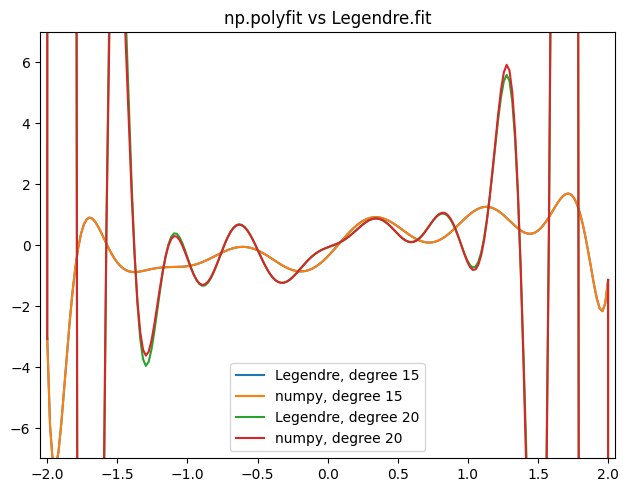

In [9]:
for degree in [15, 20]:
    # Using Legendre.fit
    legendre_coeffs = Legendre.fit(x, y_trains[2], degree)
    legendre_poly = legendre_coeffs(X_plot)
    plt.plot(X_plot, legendre_poly, label=f"Legendre, degree {degree}")

    # Using np.polyfit
    coeffs = np.polyfit(x, y_trains[2], degree)
    poly = np.poly1d(coeffs)
    y_plot = poly(X_plot)
    plt.plot(X_plot, y_plot, label=f"numpy, degree {degree}")

plt.ylim(-7, 7)
plt.xlim(-2.05, 2.05)
plt.legend()
plt.tight_layout()
plt.title("np.polyfit vs Legendre.fit")
plt.show()

# 1. Experimental data predictions with uncertaines

### 30 and 100 pseudo-data points assuming that the true function reads $\frac{x}{2} + 0.5 x^2 sin(6x^2)$ with the Gaussian noise (three scales of the noise).

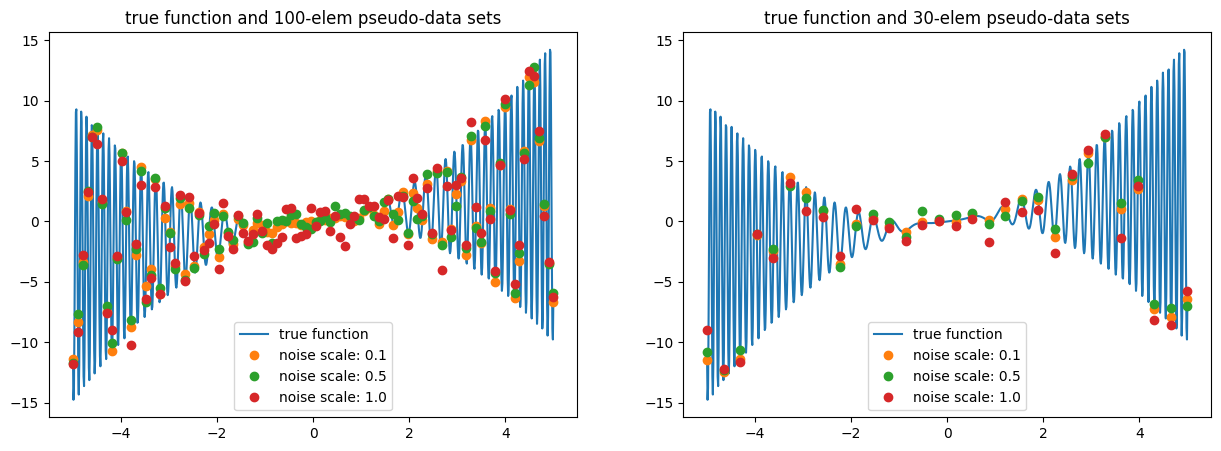

In [11]:
def f(x):
  return x/2 + 0.5*x**2*np.sin(6*x**2)

x_train_0 = np.linspace(-5, 5, 100)
x_train_1 = np.linspace(-5, 5, 30)
x_plot = np.linspace(-5, 5, 1000)
scales = [0.1, 0.5, 1.0]
y_trains_0 = []
y_trains_1 = []

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x_plot, f(x_plot), label='true function')
axs[1].plot(x_plot, f(x_plot), label='true function')

for scale in scales:
  y = f(x_train_0) + np.random.normal(scale=scale, size=len(x_train_0))
  y_trains_0.append(y)
  axs[0].plot(x_train_0, y, 'o', label=f'noise scale: {scale}')
  y = f(x_train_1) + np.random.normal(scale=scale, size=len(x_train_1))
  y_trains_1.append(y)
  axs[1].plot(x_train_1, y, 'o', label=f'noise scale: {scale}')

axs[0].set_title('true function and 100-elem pseudo-data sets')
axs[1].set_title('true function and 30-elem pseudo-data sets')
axs[0].legend()
axs[1].legend()
plt.show()

X_train_0 = x_train_0[:, np.newaxis]
X_train_1 = x_train_1[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
degrees = [3, 10, 20]

# 2.1

### Fit the polynomials of degrees 3, 10, and 20 using PolynomialFeatures from sklearn but apply Bayesian Ridge. Plot predictions with uncertainties.

Fit by 100 points:

lvl	deg	mean	std dev	fill interval
0.1	3	0.04	3.86	7.72
0.1	10	0.11	3.71	7.41
0.1	20	0.12	3.32	6.64
0.5	3	0.10	3.83	7.67
0.5	10	0.16	3.67	7.34
0.5	20	0.18	3.28	6.55
1.0	3	-0.01	3.91	7.82
1.0	10	0.05	3.73	7.46
1.0	20	0.07	3.33	6.67


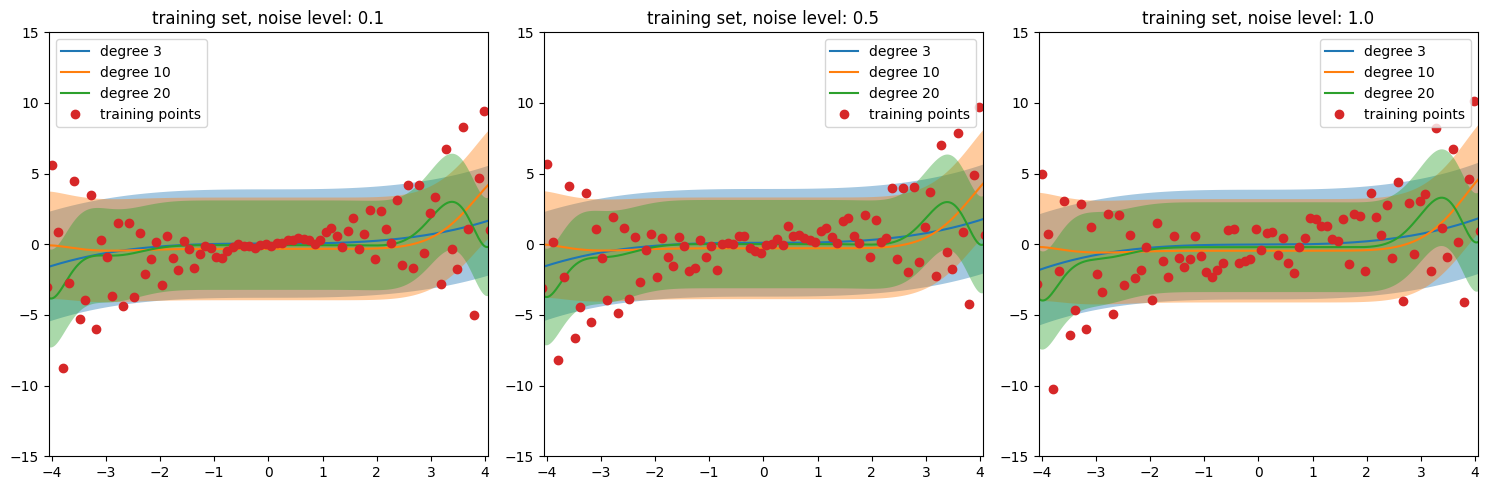

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

print("lvl\tdeg\tmean\tstd dev\tfill interval")

for i in range(3):
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), BayesianRidge())
        model.fit(X_train_0, y_trains_0[i])
        y_mean, y_std = model.predict(X_plot, return_std=True)
        axs[i].plot(X_plot, y_mean, label=f"degree {degree}")
        axs[i].fill_between(X_plot.ravel(), y_mean - y_std, y_mean + y_std, alpha=0.4)

        print(f"{scales[i]}\t{degree}\t{np.mean(y_mean):.2f}\t{np.mean(y_std):.2f}\t{2*np.mean(y_std):.2f}")

    axs[i].plot(x_train_0, y_trains_0[i], 'o', label=f'training points')
    axs[i].set_ylim(-15, 15)
    axs[i].set_xlim(-4.05, 4.05)
    axs[i].legend()
    axs[i].set_title(f"training set, noise level: {scales[i]}")

plt.tight_layout()
plt.show()

Fit by 30 points:

lvl	deg	mean	std dev	fill interval
0.1	3	-0.95	3.73	7.46
0.1	10	-0.94	2.14	4.28
0.1	20	-0.77	2.48	4.97
0.5	3	-0.84	3.57	7.14
0.5	10	-0.82	2.06	4.13
0.5	20	-0.59	2.39	4.78
1.0	3	-1.21	3.82	7.63
1.0	10	-1.24	2.52	5.04
1.0	20	-1.07	2.96	5.93


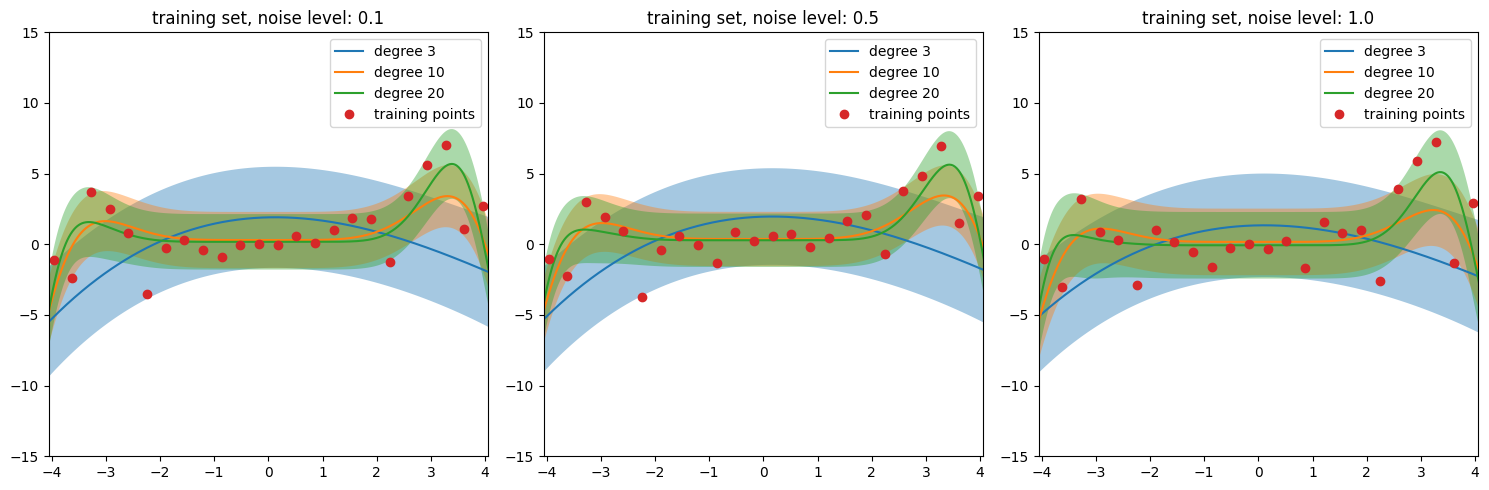

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

print("lvl\tdeg\tmean\tstd dev\tfill interval")

for i in range(3):
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), BayesianRidge())
        model.fit(X_train_1, y_trains_1[i])
        y_mean, y_std = model.predict(X_plot, return_std=True)
        axs[i].plot(X_plot, y_mean, label=f"degree {degree}")
        axs[i].fill_between(X_plot.ravel(), y_mean - y_std, y_mean + y_std, alpha=0.4)

        print(f"{scales[i]}\t{degree}\t{np.mean(y_mean):.2f}\t{np.mean(y_std):.2f}\t{2*np.mean(y_std):.2f}")

    axs[i].plot(x_train_1, y_trains_1[i], 'o', label=f'training points')
    axs[i].set_ylim(-15, 15)
    axs[i].set_xlim(-4.05, 4.05)
    axs[i].legend()
    axs[i].set_title(f"training set, noise level: {scales[i]}")

plt.tight_layout()
plt.show()

Visible overfitting on highest degree.

# 2.2

### How do uncertainties depend on the degree of the polynomial?

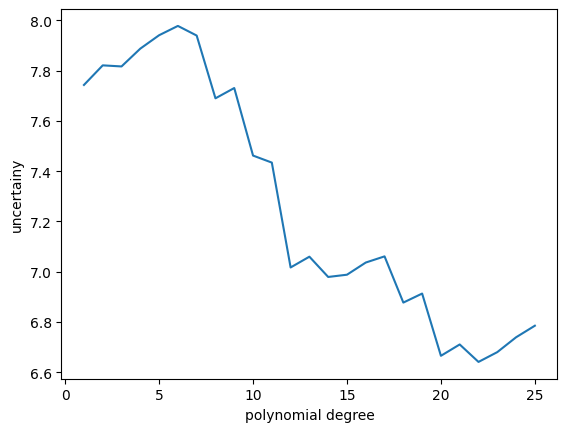

In [17]:
new_degrees = np.linspace(1,25,25)
new_degrees = [int(deg) for deg in new_degrees]
fills = []

for degree in new_degrees:
  model = make_pipeline(PolynomialFeatures(degree), BayesianRidge())
  model.fit(X_train_0, y_trains_0[2])
  y_mean, y_std = model.predict(X_plot, return_std=True)
  fills.append(2*np.mean(y_std))

plt.plot(new_degrees, fills)
plt.ylabel("uncertainy")
plt.xlabel("polynomial degree")
plt.show()